<a href="https://colab.research.google.com/github/SergiySpv/ney_m22/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна 4

з дисципліни "Нейронні мережі"

студента групи кн-31

Сопова Сергія

На основі документу вирішити завдання класифікації для набору даних Fashion MNIST(спочатку витягнемо дані).

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Для моделювання використати 3 класи індекси


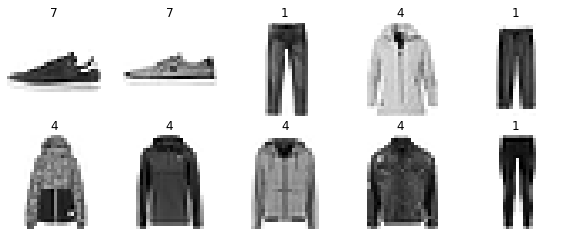

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

class_names = ['Coat','Sneaker','Trouser']
my_train_data = []
my_train_labels = []
for i in range(len(train_labels)):
  if (train_labels[i] in [4,7,1]):
    my_train_data.append(train_data[i])
    my_train_labels.append(train_labels[i])

my_test_data=[]
my_test_labels  = []
for i in range(len(test_labels)):
  if (test_labels[i] in [4,7,1]):
    my_test_data.append(test_data[i])
    my_test_labels.append(test_labels[i])

# Plot my random images of fashion MNIST
plt.figure(figsize=(10, 10))
for i in range(10):
  ax = plt.subplot(5, 5, i + 1)
  rand_index = random.choice(range(len(my_train_data)))
  plt.imshow(my_train_data[i], cmap=plt.cm.binary)
  plt.title(my_train_labels[i])
  plt.axis(False)

Моделювання провести із використанням нейронної мережі (Flatten & Dense layers)

In [3]:
my_train_data = np.array(my_train_data) / 255.0
my_train_labels = np.array(my_train_labels)
my_test_data= np.array(my_test_data) / 255.0
my_test_labels  = np.array(my_test_labels)

tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/200))

find_lr_history = model_13.fit(my_train_data,
                               my_train_labels,
                               epochs=40,
                               validation_data=(my_test_data, my_test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


563/563 [==============================] - 2s 2ms/step - loss: 0.6372 - accuracy: 0.9006 - val_loss: 0.0351 - val_accuracy: 0.9913 - lr: 0.0010
Epoch 2/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0217 - accuracy: 0.9941 - val_loss: 0.0224 - val_accuracy: 0.9943 - lr: 0.0010
Epoch 3/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0166 - accuracy: 0.9958 - val_loss: 0.0216 - val_accuracy: 0.9937 - lr: 0.0010
Epoch 4/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0132 - accuracy: 0.9962 - val_loss: 0.0175 - val_accuracy: 0.9960 - lr: 0.0010
Epoch 5/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0119 - accuracy: 0.9966 - val_loss: 0.0191 - val_accuracy: 0.9953 - lr: 0.0010
Epoch 6/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.0168 - val_accuracy: 0.9957 - lr: 0.0011
Epoch 7/40
563/563 [==============================] - 1s 2ms/step - loss: 0.0103 

Здійснити вибір оптимального кроку градієнтного алгоритму (learning_rate)

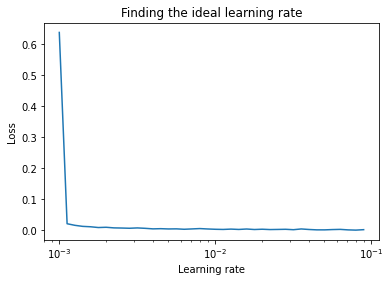

In [4]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");


In [5]:
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.07),
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(my_train_data,
                       my_train_labels,
                       epochs=20,
                       validation_data=(my_test_data, my_test_labels))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


563/563 [==============================] - 2s 2ms/step - loss: 0.1214 - accuracy: 0.9656 - val_loss: 0.0820 - val_accuracy: 0.9907
Epoch 2/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0428 - accuracy: 0.9910 - val_loss: 0.0590 - val_accuracy: 0.9893
Epoch 3/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0325 - accuracy: 0.9932 - val_loss: 0.0318 - val_accuracy: 0.9943
Epoch 4/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0351 - accuracy: 0.9922 - val_loss: 0.0345 - val_accuracy: 0.9937
Epoch 5/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0465 - accuracy: 0.9895 - val_loss: 0.0409 - val_accuracy: 0.9913
Epoch 6/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0430 - accuracy: 0.9928 - val_loss: 0.0554 - val_accuracy: 0.9930
Epoch 7/20
563/563 [==============================] - 1s 2ms/step - loss: 0.0708 - accuracy: 0.9876 - val_loss: 0.0638 - val_accuracy: 0.9870
Epoch 8/20
563/56

Здійснити побудову Confusion Matrix

94/94 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 0.9960


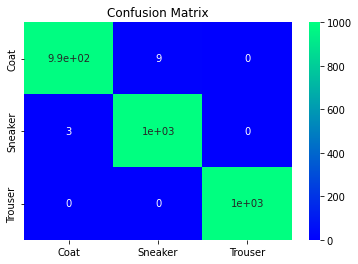

In [7]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns

test_loss, test_acc = model_13.evaluate(my_test_data, my_test_labels)


predictions = model_13.predict(my_test_data)
y_predictions = []
for i in predictions:
  i_max = np.argmax(i)
  y_predictions = np.append(y_predictions, i_max)

cm = confusion_matrix(my_test_labels, y_predictions)
dataframe_cm = pd.DataFrame(cm, index = class_names, columns = class_names)

sns.heatmap(dataframe_cm, annot=True, cmap="winter")
plt.title('Confusion Matrix')


plt.show()